<a href="https://colab.research.google.com/github/SecondBetter-create/centjes.enterprise-commerce/blob/main/test/tailor_quick_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GarmentIQ Tailor Quick Start

In [1]:
!pip install garmentiq -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 139.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 

In [2]:
import garmentiq as giq
from garmentiq.classification.model_definition import tinyViT
from garmentiq.landmark.detection.model_definition import PoseHighResolutionNet
from garmentiq.garment_classes import garment_classes
from garmentiq.landmark.derivation.derivation_dict import derivation_dict

In [3]:
# Download 4 test images
# cloth_1 and cloth_2 are short sleeve tops, cloth_3 is vest dress, cloth_4 is skirt
!mkdir -p test_image
!wget -q -O /content/test_image/cloth_1.jpg \
    https://raw.githubusercontent.com/lygitdata/GarmentIQ/refs/heads/gh-pages/asset/img/cloth_1.jpg
!wget -q -O /content/test_image/cloth_2.jpg \
    https://raw.githubusercontent.com/lygitdata/GarmentIQ/refs/heads/gh-pages/asset/img/cloth_2.jpg
!wget -q -O /content/test_image/cloth_3.jpg \
    https://raw.githubusercontent.com/lygitdata/GarmentIQ/refs/heads/gh-pages/asset/img/cloth_3.jpg
!wget -q -O /content/test_image/cloth_4.jpg \
    https://raw.githubusercontent.com/lygitdata/GarmentIQ/refs/heads/gh-pages/asset/img/cloth_4.jpg

# Download the classification model
!mkdir -p models
!wget -q -O /content/models/tiny_vit_inditex_finetuned.pt \
    https://huggingface.co/lygitdata/garmentiq/resolve/main/tiny_vit_inditex_finetuned.pt

# Download the landmark detection model
!wget -q -O /content/models/hrnet.pth \
    https://huggingface.co/lygitdata/garmentiq/resolve/main/hrnet.pth

In [4]:
# Setup the tailor agent
tailor = giq.tailor(
    input_dir="/content/test_image",
    model_dir="/content/models",
    output_dir="/content/output",
    class_dict=garment_classes,
    do_derive=True,
    derivation_dict=derivation_dict,
    do_refine=True,
    classification_model_path="tiny_vit_inditex_finetuned.pt",
    classification_model_class=tinyViT,
    classification_model_args={
        "num_classes": len(list(garment_classes.keys())),
        "img_size": (120, 184),
        "patch_size": 6,
        "resize_dim": (120, 184),
        "normalize_mean": [0.8047, 0.7808, 0.7769],
        "normalize_std": [0.2957, 0.3077, 0.3081],
    },
    segmentation_model_name="lygitdata/BiRefNet_garmentiq_backup",
    segmentation_model_args={
        "trust_remote_code": True,
        "resize_dim": (1024, 1024),
        "normalize_mean": [0.485, 0.456, 0.406],
        "normalize_std": [0.229, 0.224, 0.225],
        "high_precision": True,
        "background_color": [102, 255, 102],
    },
    landmark_detection_model_path="hrnet.pth",
    landmark_detection_model_class=PoseHighResolutionNet(),
    landmark_detection_model_args={
        "scale_std": 200.0,
        "resize_dim": [288, 384],
        "normalize_mean": [0.485, 0.456, 0.406],
        "normalize_std": [0.229, 0.224, 0.225],
    },
)

# See the tailor agent's basic information
tailor.summary()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

BiRefNet_config.py:   0%|          | 0.00/298 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/lygitdata/BiRefNet_garmentiq_backup:
- BiRefNet_config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


birefnet.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/lygitdata/BiRefNet_garmentiq_backup:
- birefnet.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.12/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


model.safetensors:   0%|          | 0.00/444M [00:00<?, ?B/s]

                              TAILOR AGENT SUMMARY                              
--------------------------------DIRECTORY PATHS---------------------------------
Input directory:          /content/test_image
Model directory:          /content/models
Output directory:         /content/output

------------------------------------CLASSES-------------------------------------
Class Index | Class Name
----------- | ------------------------------------------------------------------
0           | long sleeve dress
1           | long sleeve top
2           | short sleeve dress
3           | short sleeve top
4           | shorts
5           | skirt
6           | trousers
7           | vest
8           | vest dress

------------------------------------OPTIONS-------------------------------------
Do refine?:               True
Do derive?:               True

-------------------------------------MODELS-------------------------------------
Classification Model:     tinyViT
Segmentation Model:       

In [5]:
# Start the measurement with refinement and derivation
metadata, outputs = tailor.measure(save_segmentation_image=True, save_measurement_image=True)

Start measuring 4 garment images ...
There are 5 measurement steps: classification, segmentation, landmark detection,
landmark refinement, and landmark derivation.


Classification:   0%|          | 0/4 [00:00<?, ?it/s]

Segmentation:   0%|          | 0/4 [00:00<?, ?it/s]

Landmark detection:   0%|          | 0/4 [00:00<?, ?it/s]

Landmark refinement:   0%|          | 0/4 [00:00<?, ?it/s]

Landmark derivation:   0%|          | 0/4 [00:00<?, ?it/s]

Save segmentation image:   0%|          | 0/4 [00:00<?, ?it/s]

Save measurement image:   0%|          | 0/4 [00:00<?, ?it/s]

Save measurement json:   0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
# See the metadata
# It makes file access much easier
print(metadata)

      filename             class                                   mask_image  \
0  cloth_4.jpg             skirt  /content/output/mask_image/cloth_4_mask.png   
1  cloth_2.jpg  short sleeve top  /content/output/mask_image/cloth_2_mask.png   
2  cloth_3.jpg        vest dress  /content/output/mask_image/cloth_3_mask.png   
3  cloth_1.jpg  short sleeve top  /content/output/mask_image/cloth_1_mask.png   

                                   bg_modified_image  \
0  /content/output/bg_modified_image/cloth_4_bg_m...   
1  /content/output/bg_modified_image/cloth_2_bg_m...   
2  /content/output/bg_modified_image/cloth_3_bg_m...   
3  /content/output/bg_modified_image/cloth_1_bg_m...   

                                   measurement_image  \
0  /content/output/measurement_image/cloth_4_meas...   
1  /content/output/measurement_image/cloth_2_meas...   
2  /content/output/measurement_image/cloth_3_meas...   
3  /content/output/measurement_image/cloth_1_meas...   

                                

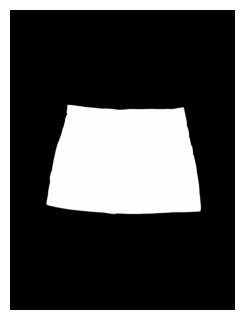

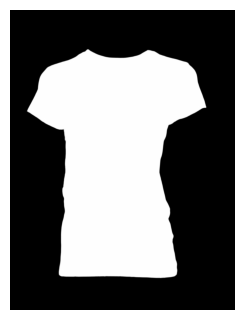

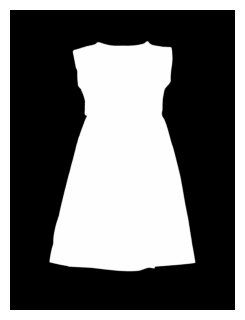

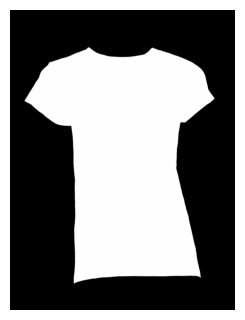

In [7]:
# Plot the masks
# Go to /content/output/mask_image/ to see the high resolution images
for image in metadata['mask_image']:
  giq.landmark.plot(image_path=image, figsize=(3, 3))

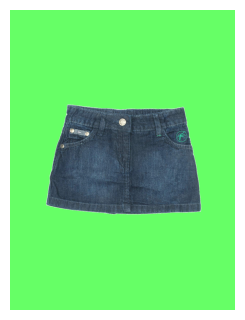

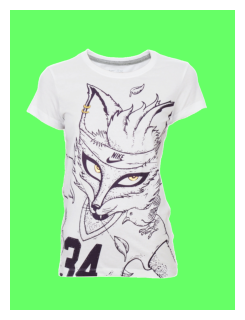

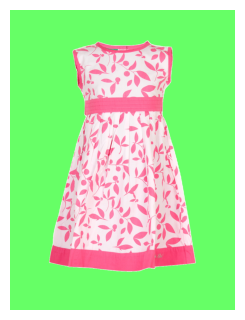

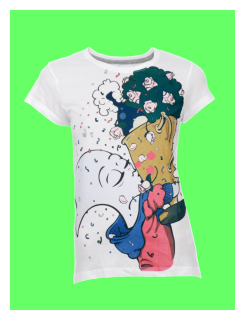

In [8]:
# Plot the background modified images
# Go to /content/output/bg_modified_image to see the high resolution images
for image in metadata['bg_modified_image']:
  giq.landmark.plot(image_path=image, figsize=(3, 3))

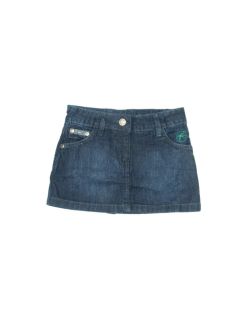

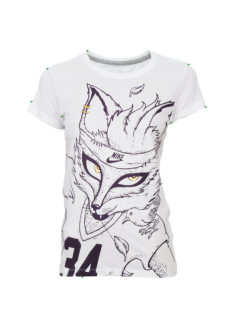

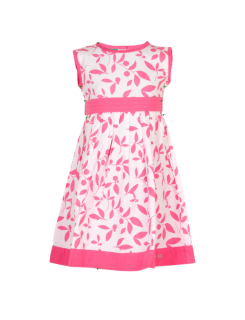

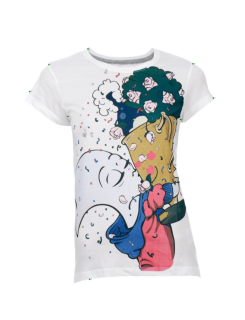

In [9]:
# Plot the images with desired landmarks
# Go to /content/output/measurement_image/ to see the high resolution images
for image in metadata['measurement_image']:
  giq.landmark.plot(image_path=image, figsize=(3, 3))

In [10]:
# See the measurement results in JSON format
# Go to /content/output/measurement_json/ to see the JSON files
import json

for json_path in metadata['measurement_json']:
    with open(json_path, 'r') as file:
        data = json.load(file)
        print(f"{json_path}:\n")
        print(json.dumps(data, indent=4, sort_keys=True))
        print("\n\n")

/content/output/measurement_json/cloth_4_measurement.json:

{
    "cloth_4.jpg": {
        "class": "skirt",
        "landmarks": {
            "1": {
                "conf": 0.8919008374214172,
                "x": 469.0,
                "y": 765.0
            },
            "2": {
                "conf": 0.8911009430885315,
                "x": 913.0,
                "y": 811.0
            },
            "3": {
                "conf": 0.9091580510139465,
                "x": 1378.0,
                "y": 785.0
            },
            "4": {
                "conf": 0.832025945186615,
                "x": 361.0,
                "y": 1161.0
            },
            "6": {
                "conf": 0.8835731744766235,
                "x": 911.0,
                "y": 1626.0
            },
            "8": {
                "conf": 0.8809543251991272,
                "x": 1463.0,
                "y": 1193.0
            }
        },
        "measurements": {
            "full length": {
 